In [1]:
import os 
 
 
os.environ['KAGGLE_USERNAME'] = "kuwarkapur012met"
 
os.environ['KAGGLE_KEY'] = "52dd29cda56e17eb9aabc2b8cbf5da0b"
 
! kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:03<00:00, 111MB/s] 
100% 346M/346M [00:03<00:00, 116MB/s]


In [2]:
import zipfile
zip=zipfile.ZipFile('intel-image-classification.zip')
zip.extractall()
zip.close()

In [3]:
for dirpath, dirnames, filenames in os.walk("seg_pred"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
for dirpath, dirnames, filenames in os.walk("seg_test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
for dirpath, dirnames, filenames in os.walk("seg_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")  

There are 1 directories and 0 images in 'seg_pred'.
There are 0 directories and 7301 images in 'seg_pred/seg_pred'.
There are 1 directories and 0 images in 'seg_test'.
There are 6 directories and 0 images in 'seg_test/seg_test'.
There are 0 directories and 510 images in 'seg_test/seg_test/sea'.
There are 0 directories and 501 images in 'seg_test/seg_test/street'.
There are 0 directories and 474 images in 'seg_test/seg_test/forest'.
There are 0 directories and 553 images in 'seg_test/seg_test/glacier'.
There are 0 directories and 525 images in 'seg_test/seg_test/mountain'.
There are 0 directories and 437 images in 'seg_test/seg_test/buildings'.
There are 1 directories and 0 images in 'seg_train'.
There are 6 directories and 0 images in 'seg_train/seg_train'.
There are 0 directories and 2274 images in 'seg_train/seg_train/sea'.
There are 0 directories and 2382 images in 'seg_train/seg_train/street'.
There are 0 directories and 2271 images in 'seg_train/seg_train/forest'.
There are 0 dire

# for viewing random image and getting to know the data

In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

class_labels=["mountain","buildings","forest","glacier","sea","forest"]
randomy=random.choice(class_labels)
view_random_image("seg_train/seg_train/" , randomy)

Image shape: (150, 150, 3)


# for plotting loss and accuracy curves

In [88]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# importing all the important libraries and lets get this started

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D

# before getting started let me tell you this that we have created 4 models with data augmentation and without that respectively. you can see the results below down there

In [42]:
train_data=ImageDataGenerator(rescale=1/255.)
test_data=ImageDataGenerator(rescale=1/255.)

In [44]:
train_dir='seg_train/seg_train'
test_dir='seg_test/seg_test'

train=train_data.flow_from_directory(train_dir,
                                     target_size=(150,150),
                                     batch_size=64)
test=test_data.flow_from_directory(test_dir,
                                     target_size=(150,150),
                                     batch_size=64)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_1=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),     
    MaxPool2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(6,activation='softmax')
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
model_1.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
220/220 [==============================] - 69s 172ms/step - loss: 1.0038 - accuracy: 0.6099 - val_loss: 0.9075 - val_accuracy: 0.6387
Epoch 2/5
220/220 [==============================] - 37s 166ms/step - loss: 0.8117 - accuracy: 0.6932 - val_loss: 0.8001 - val_accuracy: 0.6993
Epoch 3/5
220/220 [==============================] - 36s 164ms/step - loss: 0.7131 - accuracy: 0.7381 - val_loss: 0.7297 - val_accuracy: 0.7340
Epoch 4/5
220/220 [==============================] - 36s 163ms/step - loss: 0.6613 - accuracy: 0.7597 - val_loss: 0.6794 - val_accuracy: 0.7540
Epoch 5/5
220/220 [==============================] - 36s 163ms/step - loss: 0.6195 - accuracy: 0.7750 - val_loss: 0.7149 - val_accuracy: 0.7337


In [ ]:
model_1.evaluate(test)

47/47 [==============================] - 5s 114ms/step - loss: 0.7149 - accuracy: 0.7337


[0.7148860096931458, 0.7336666584014893]

In [ ]:
model_2=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),     
    MaxPool2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(6,activation='softmax')
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_2=model_2.fit(train,
            epochs=15,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/15
220/220 [==============================] - 37s 166ms/step - loss: 1.0928 - accuracy: 0.5725 - val_loss: 0.9295 - val_accuracy: 0.6307
Epoch 2/15
220/220 [==============================] - 36s 165ms/step - loss: 0.8304 - accuracy: 0.6915 - val_loss: 0.8751 - val_accuracy: 0.6430
Epoch 3/15
220/220 [==============================] - 36s 164ms/step - loss: 0.7114 - accuracy: 0.7344 - val_loss: 0.6866 - val_accuracy: 0.7443
Epoch 4/15
220/220 [==============================] - 37s 166ms/step - loss: 0.6334 - accuracy: 0.7689 - val_loss: 0.6453 - val_accuracy: 0.7543
Epoch 5/15
220/220 [==============================] - 37s 166ms/step - loss: 0.5739 - accuracy: 0.7902 - val_loss: 0.6536 - val_accuracy: 0.7600
Epoch 6/15
220/220 [==============================] - 36s 164ms/step - loss: 0.5166 - accuracy: 0.8127 - val_loss: 0.6292 - val_accuracy: 0.7773
Epoch 7/15
220/220 [==============================] - 36s 164ms/step - loss: 0.4733 - accuracy: 0.8293 - val_loss: 0.6308 - val_ac

In [ ]:
plot_loss_curves(history_2)

In [86]:
train_new=ImageDataGenerator(rotation_range=5,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             shear_range=0.2, 
                             zoom_range=0.3,
                             horizontal_flip=True, 
                             vertical_flip=True, 
                             rescale=1/255.)
train_new_1=ImageDataGenerator(rotation_range=5,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             shear_range=0.2, 
                             zoom_range=0.3, 
                             vertical_flip=True, 
                             rescale=1/255.)


In [87]:
train_dir='seg_train/seg_train'

train_0=train_new.flow_from_directory(train_dir,
                                     target_size=(224,224),
                                     batch_size=32)

train_1=train_new_1.flow_from_directory(train_dir,
                                     target_size=(224,224),
                                     batch_size=32)



Found 14034 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [ ]:
model_3=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),     
    MaxPool2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(6,activation='softmax')
])

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_3=model_3.fit(train_0,
            epochs=5,
            steps_per_epoch=len(train_0),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
439/439 [==============================] - 184s 416ms/step - loss: 1.2797 - accuracy: 0.4694 - val_loss: 1.0226 - val_accuracy: 0.6130
Epoch 2/5
439/439 [==============================] - 182s 414ms/step - loss: 1.0895 - accuracy: 0.5629 - val_loss: 0.9408 - val_accuracy: 0.6370
Epoch 3/5
439/439 [==============================] - 180s 410ms/step - loss: 1.0226 - accuracy: 0.6008 - val_loss: 0.8896 - val_accuracy: 0.6827
Epoch 4/5
439/439 [==============================] - 180s 410ms/step - loss: 0.9768 - accuracy: 0.6228 - val_loss: 0.7844 - val_accuracy: 0.6990
Epoch 5/5
439/439 [==============================] - 183s 417ms/step - loss: 0.9103 - accuracy: 0.6493 - val_loss: 0.7379 - val_accuracy: 0.7203


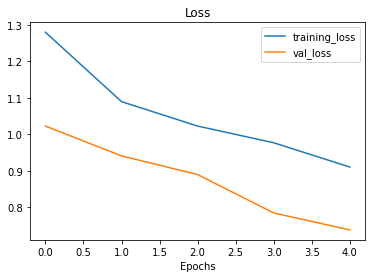

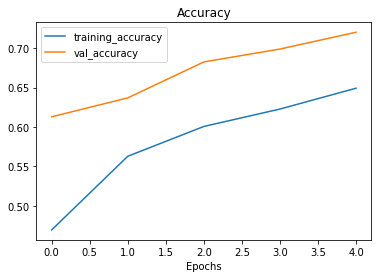

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_4=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),     
    MaxPool2D(pool_size=2),

    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(6,activation='softmax')
])

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_4=model_4.fit(train_1,
            epochs=5,
            steps_per_epoch=len(train_1),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
439/439 [==============================] - 180s 409ms/step - loss: 1.3186 - accuracy: 0.4281 - val_loss: 1.0538 - val_accuracy: 0.5310
Epoch 2/5
439/439 [==============================] - 182s 413ms/step - loss: 1.1135 - accuracy: 0.5447 - val_loss: 0.9126 - val_accuracy: 0.6533
Epoch 3/5
439/439 [==============================] - 181s 413ms/step - loss: 1.0416 - accuracy: 0.5789 - val_loss: 0.9248 - val_accuracy: 0.6310
Epoch 4/5
439/439 [==============================] - 182s 416ms/step - loss: 0.9825 - accuracy: 0.6049 - val_loss: 0.8098 - val_accuracy: 0.6940
Epoch 5/5
439/439 [==============================] - 179s 409ms/step - loss: 0.9235 - accuracy: 0.6286 - val_loss: 0.7801 - val_accuracy: 0.6897


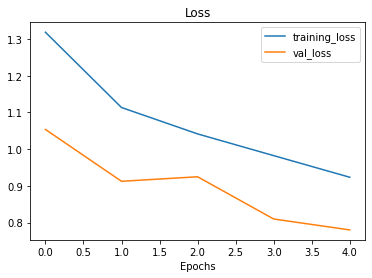

In [ ]:
plot_loss_curves(history_4)

In [45]:
model_7=Sequential([
    Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
    Conv2D(32,3,activation="relu"),     
    MaxPool2D(pool_size=2),

    Conv2D(64,3,activation='relu'),
    Conv2D(64,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    
    Conv2D(96,3,activation='relu'),
    Conv2D(96,3,activation="relu"),  
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(96,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(6,activation='softmax')
])

model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
history_8=model_7.fit(train,
            epochs=10,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/10
220/220 [==============================] - 48s 204ms/step - loss: 1.1942 - accuracy: 0.5145 - val_loss: 0.9401 - val_accuracy: 0.6230
Epoch 2/10
220/220 [==============================] - 42s 193ms/step - loss: 0.9281 - accuracy: 0.6293 - val_loss: 0.7522 - val_accuracy: 0.6830
Epoch 3/10
220/220 [==============================] - 43s 196ms/step - loss: 0.7964 - accuracy: 0.6962 - val_loss: 0.6396 - val_accuracy: 0.7687
Epoch 4/10
220/220 [==============================] - 42s 193ms/step - loss: 0.6707 - accuracy: 0.7602 - val_loss: 0.6065 - val_accuracy: 0.7737
Epoch 5/10
220/220 [==============================] - 43s 194ms/step - loss: 0.6000 - accuracy: 0.7850 - val_loss: 0.5316 - val_accuracy: 0.8030
Epoch 6/10
220/220 [==============================] - 43s 193ms/step - loss: 0.5486 - accuracy: 0.8018 - val_loss: 0.5157 - val_accuracy: 0.8160
Epoch 7/10
220/220 [==============================] - 42s 192ms/step - loss: 0.4849 - accuracy: 0.8295 - val_loss: 0.5136 - val_ac

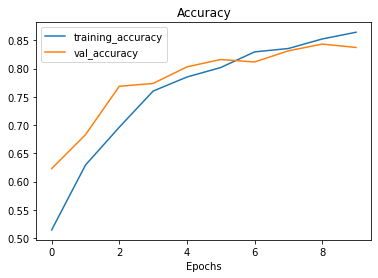

In [89]:
plot_loss_curves(history_8)

## reading results for the prediction

In [84]:
import cv2 as cv
img=cv.imread('/content/seg_pred/seg_pred/10371.jpg')
im=tf.cast(img,dtype=tf.float32)
im=im/255.
c=tf.expand_dims(im,axis=0)

## prediction of the results 

1


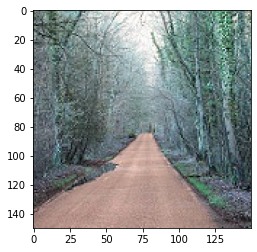

In [85]:
ress=model_7.predict(c)
print(ress.argmax())
import matplotlib.pyplot as plt
plt.imshow(img)